# Basic Multi Layer Perceptron (MLP) Neural Network

In [1]:
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense
from keras.datasets import mnist

import cv2

import matplotlib.pyplot as plt

In [2]:
# !wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

In [3]:
# load mnist dataset
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data(path='../datasets/mnist.npz')

In [4]:
# dataset shapes
print('Train data shape:', x_train_org.shape)
print('Test  data shape:', x_test_org.shape)

Train data shape: (60000, 28, 28)
Test  data shape: (10000, 28, 28)


Number =  5


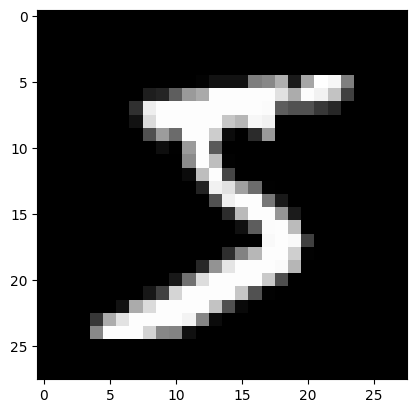

In [5]:
# preview image
print('Number = ', y_train_org[0])
plt.imshow(x_train_org[0], cmap='gray')

In [6]:
# Shrink image size
im_size = 15
x_train_conv = [cv2.resize(img, dsize=(im_size, im_size)) for img in x_train_org]
x_test_conv = [cv2.resize(img, dsize=(im_size, im_size)) for img in x_test_org]

In [7]:
# new dataset shapes
print('Train data shape:', np.shape(x_train_conv))
print('Test  data shape:', np.shape(x_test_conv))

Train data shape: (60000, 10, 10)
Test  data shape: (10000, 10, 10)


Number =  5


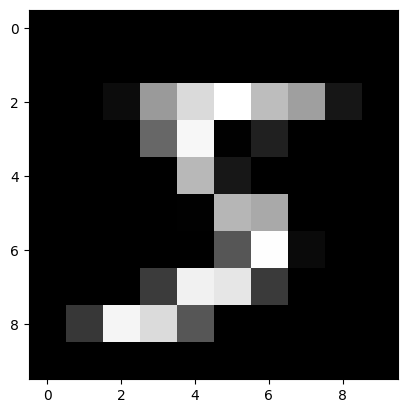

In [8]:
# new dataset element preview
print('Number = ', y_train_org[0])
plt.imshow(x_train_conv[0], cmap='gray')

In [9]:
# Faltten Image (convert matrix to vector)
# Model acceptable shape (number of samples, number of features)
x_train = np.reshape(x_train_conv, [-1, im_size**2])
x_test = np.reshape(x_test_conv, [-1, im_size**2])


In [10]:
# dataset shapes, after flattening images
print('Train data shape:', np.shape(x_train))
print('Test  data shape:', np.shape(x_test))

Train data shape: (60000, 100)
Test  data shape: (10000, 100)


In [11]:
y_train_org.max() + 1

10

In [12]:
# One hot labels to use by model [based on soft max]
y_train = keras.utils.to_categorical(y_train_org, num_classes=10)
y_test = keras.utils.to_categorical(y_test_org, num_classes=10)


In [13]:
print('Train label shape:', np.shape(y_train))
print('Test  label shape:', np.shape(y_test))

Train label shape: (60000, 10)
Test  label shape: (10000, 10)


In [14]:
print(y_test[0])
print(y_test[0].argmax())

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


In [15]:
# Normalize data
# use data type = float32 / may study on mixed precison
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

x_train/= 255
x_test/= 255

In [16]:
# Only values change and shape remain as before
print('Train data shape:', np.shape(x_train))
print('Test  data shape:', np.shape(x_test))

Train data shape: (60000, 100)
Test  data shape: (10000, 100)


## Model

In [17]:
# Create model architectue
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(im_size**2,)))
model.add(Dense(10, activation='softmax'))


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,114 (27.79 KB)

 Trainable params: 7,114 (27.79 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Explain model parameters
# layer 1: current layer neurons * last layer neurons + current layer bias
l1_params = 64 * 36 + 64
print('layer 1 params:', l1_params)

# layer 2: current layer neurons * last layer neurons + current layer bias
l2_params = 10 * 64 + 10
print('layer 2 params:', l2_params )

print('Total params:', l1_params + l2_params )


layer 1 params: 2368
layer 2 params: 650
Total params: 3018


In [20]:
# Compile Model
model.compile( optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Iterration:**
<br/>

**Epochs:**
<br/>

**NOTE: Itterations count are more important than epoch count**

In [21]:
%%time

# Fit (learn) model
history= model.fit(x=x_train,
                   y=y_train,
                   batch_size=32,
                   epochs=100,
                   validation_split=0.2
                  )

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6969 - loss: 1.1361 - val_accuracy: 0.8897 - val_loss: 0.3861
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8826 - loss: 0.3993 - val_accuracy: 0.9095 - val_loss: 0.3170
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9013 - loss: 0.3320 - val_accuracy: 0.9193 - val_loss: 0.2808
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9156 - loss: 0.2899 - val_accuracy: 0.9274 - val_loss: 0.2516
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9237 - loss: 0.2581 - val_accuracy: 0.9333 - val_loss: 0.2296
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9295 - loss: 0.2376 - val_accuracy: 0.9358 - val_loss: 0.2149
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9342 - loss: 0.2163 - val_accuracy: 0.9402 - val_loss: 0.2013
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9391 - loss: 0.2032 - val_accu

In [45]:
x_train.shape[0] * 0.8 / 64

750.0

In [46]:
?model.fit

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It could be:
        - A NumPy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
        - A tensor, or a list of tensors
        (in case the model has multiple inputs).
        - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
        - A `tf.data.Dataset`. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
        - A `keras.utils.PyDataset` returning `(inputs,
      

In [22]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

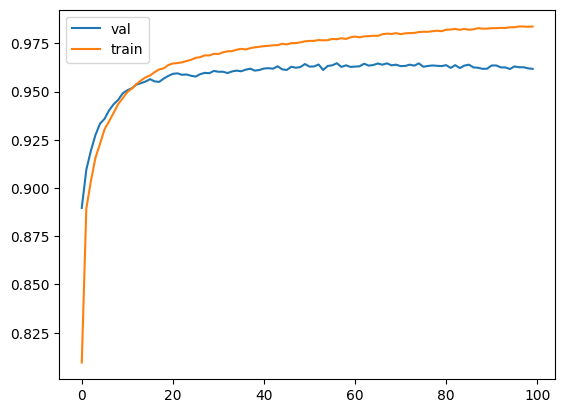

In [23]:
plt.title("Model Accuracy")
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val', 'train'])

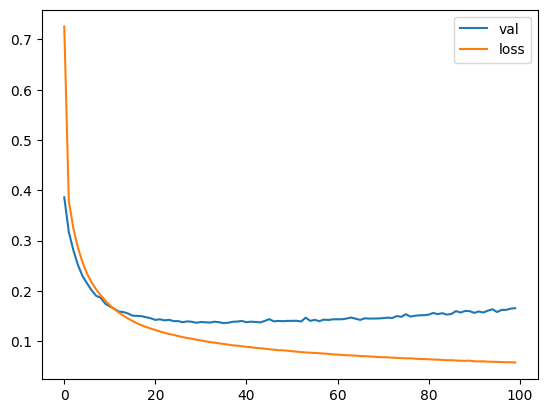

In [24]:
plt.title("Model Loss")
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'loss'])

## Evaluate model

In [25]:
# Use un-seen data:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9539 - loss: 0.1826


In [26]:
print(f'Loss: {loss:.2f} , Accuracy: {acc:.2f}')

Loss: 0.15 , Accuracy: 0.96


In [27]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [28]:
pred.shape

(10000, 10)

In [29]:
print(f'Original label: {y_test_org[0]}')
print(f'One Hot  label: {y_test[0]}')
# print(x_test_org[0])
print('Max value argument:', x_test_org[0].argmax())
print(f'Max value : {x_test_org[0].max()}\n')

# Show prediction as array of probabilities
print(f'Predicted label: \n{pred[0]}')

# Return Class based on highest probability
print('\nMax value argument:', pred[0].argmax())
print(f'Max value : {pred[0].max()}')


Original label: 7
One Hot  label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Max value argument: 355
Max value : 255

Predicted label: 
[8.4995219e-16 3.0453330e-20 4.2444902e-14 4.6847620e-07 2.7582002e-17
 5.1484532e-11 7.3458551e-23 9.9999952e-01 1.3652351e-11 2.5368488e-08]

Max value argument: 7
Max value : 0.9999995231628418


In [30]:
pred.max(axis=1)[:100]

array([0.9999995 , 0.9999999 , 0.9995821 , 0.9999988 , 0.999967  ,
       0.99989593, 0.99993205, 0.95415956, 0.8856492 , 0.9996927 ,
       1.        , 0.9991623 , 0.89691323, 1.        , 0.99999833,
       0.9999833 , 0.9950923 , 0.99999964, 0.8815947 , 0.99993384,
       0.97297895, 0.99991703, 0.9999982 , 0.99999976, 0.95178515,
       1.        , 0.86060923, 0.9999906 , 1.        , 0.99998057,
       0.99999976, 0.9988494 , 1.        , 0.9999993 , 0.9998802 ,
       0.9999999 , 0.99998796, 0.9979936 , 0.9995028 , 0.9996966 ,
       0.92835474, 0.9977825 , 0.9999999 , 0.9997211 , 0.9598165 ,
       0.99995196, 0.9999937 , 0.9995327 , 0.9969458 , 0.99991524,
       0.99977285, 0.99999857, 0.9999975 , 0.9995857 , 1.        ,
       0.99851733, 0.99999917, 0.99997425, 0.99752265, 0.99961424,
       1.        , 0.9997539 , 0.7306125 , 0.99951816, 0.99999857,
       0.9630809 , 0.99929607, 0.9999796 , 1.        , 0.99999976,
       0.9999993 , 1.        , 0.99999857, 0.9993285 , 0.99606

In [31]:
pred.argmax(axis=1)[:100]

array([7, 2, 1, 0, 4, 1, 4, 3, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 8, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 4, 7, 6, 9], dtype=int64)

In [32]:
y_test.argmax(axis=1)[:100]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=int64)

In [33]:
np.mean(pred.argmax(axis=1) == y_test.argmax(axis=1))

0.9614

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
print(classification_report(y_true=y_test_org, y_pred=pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.97      0.95      0.96       892
           6       0.98      0.96      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.95      0.94      0.95       974
           9       0.94      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [36]:
print(confusion_matrix(y_true=y_test_org, y_pred=pred.argmax(axis=1)))

[[ 962    0    2    2    2    1    1    2    2    6]
 [   0 1123    1    2    2    0    4    0    3    0]
 [   5    5  992   10    3    1    1    8    6    1]
 [   1    1    6  976    2    6    0    4    8    6]
 [   3    4    3    0  945    1    3    1    3   19]
 [   4    2    1   19    2  843    6    1   10    4]
 [  12    4    2    1    7    6  920    1    4    1]
 [   1    9   10    3    4    1    0  982    4   14]
 [   6    3   10   15    4    7    2    5  914    8]
 [   3    8    0    7   13    6    0    9    6  957]]


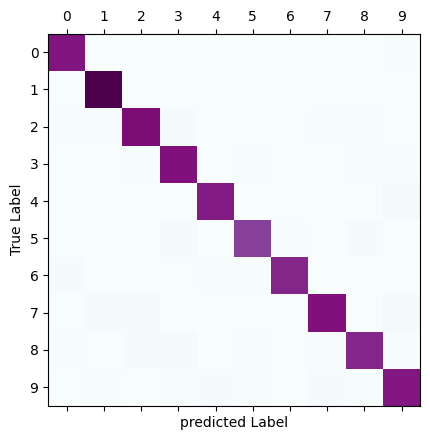

In [37]:
plt.matshow(confusion_matrix(y_true=y_test_org, y_pred=pred.argmax(axis=1)), cmap='BuPu')
plt.xticks(range(10));
plt.yticks(range(10));
plt.xlabel("predicted Label");
plt.ylabel("True Label");


## Save Model

In [48]:
model.save('models/model_basic_mlp.keras')
model.save_weights('models/model_basic_mlp.weights.h5')